# Data Exploration and Cleaning:
    -  Univariable study of target and features (Continuous & Categorical features, separately)
    -  Multivariate study of target and features
    -  Testing the statistical assumptions: Normality, Homoscedasticity, etc.
    -  Basic cleaning: Outliers, Missing data, Duplicate values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Functions to detect & plot Outliers with different approaches:

def zscore_based_outliers(ys, threshold = 3):

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.abs(z_scores) > threshold

    

def mad_based_outlier(ys, thresh=3.5):
    median = np.median(ys, axis=0)
    mad=np.median(np.array([np.abs(y - median)  for y in ys]))
    modified_z_score=[0.6745 *(y - median) / mad for y in ys]
    return np.abs(modified_z_score) > thresh


def iqr_based_outliers(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = np.abs(quartile_3 - quartile_1)
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (ys > upper_bound) | (ys < lower_bound)

def plot_outliers(x):
    fig, axes = plt.subplots(nrows=3)
    fig.set_size_inches(6, 6)
    for ax, func in zip(axes, [zscore_based_outliers, mad_based_outlier, iqr_based_outliers]):
        sns.distplot(x, ax=ax, rug=True, hist=True)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    
    axes[0].set_title('Zscore-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('IQR-based Outliers', **kwargs)
    
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

In [3]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/pima-indian-diabetes/indians-diabetes.csv') 

df.head(3)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant                                                    768 non-null int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null int64
Diastolic blood pressure (mm Hg)                                            768 non-null int64
Triceps skin fold thickness (mm)                                            768 non-null int64
2-Hour serum insulin (mu U/ml)                                              768 non-null int64
Body mass index                                                             768 non-null float64
Diabetes pedigree function                                                  768 non-null float64
age                                                                         768 non-null int64
target                                                                      768 non-null int64
dtypes: float64(2), int64(7)
memory u

In [5]:
# Change the name of columns for convenience:
df.columns=['NP', 'GC', 'BP', 'ST', 'I',  'BMI', 'PF', 'Age', 'target']

______________________________________________________________________
variable name:  NP 

Statistical description: 
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: NP, dtype: float64

Skewness =  0.9016739791518588
Kurtosis =  0.15921977754746486


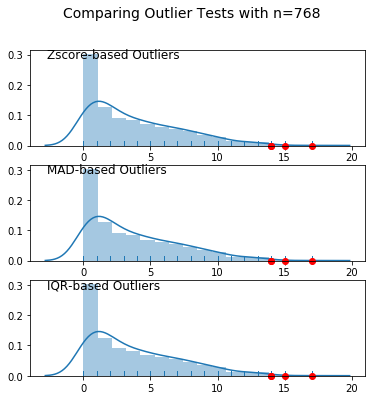

______________________________________________________________________
variable name:  GC 

Statistical description: 
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: GC, dtype: float64

Skewness =  0.17375350179188992
Kurtosis =  0.6407798203735053


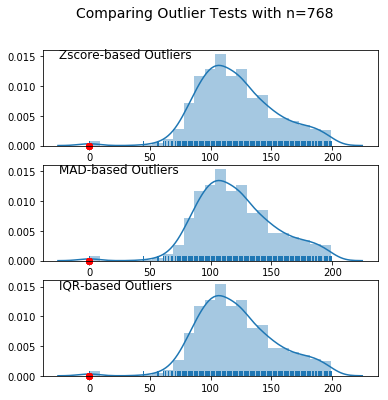

______________________________________________________________________
variable name:  BP 

Statistical description: 
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BP, dtype: float64

Skewness =  -1.8436079833551302
Kurtosis =  5.180156560082496


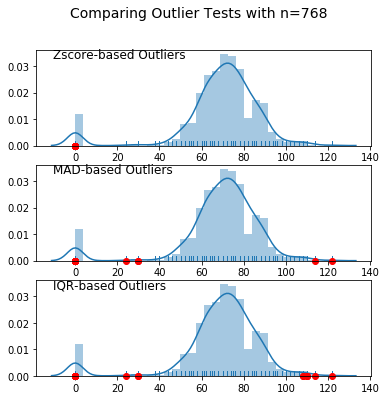

______________________________________________________________________
variable name:  ST 

Statistical description: 
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: ST, dtype: float64

Skewness =  0.10937249648187608
Kurtosis =  -0.520071866153013


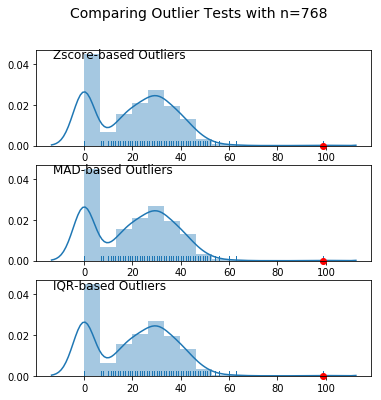

______________________________________________________________________
variable name:  I 

Statistical description: 
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: I, dtype: float64

Skewness =  2.272250858431574
Kurtosis =  7.2142595543487715


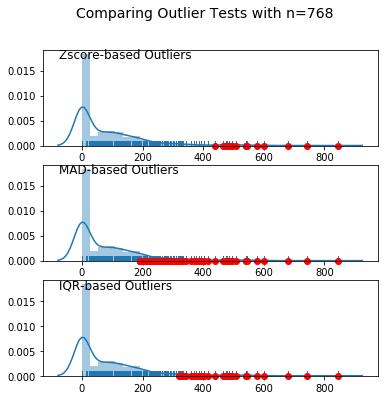

______________________________________________________________________
variable name:  BMI 

Statistical description: 
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

Skewness =  -0.42898158845356543
Kurtosis =  3.290442900816981


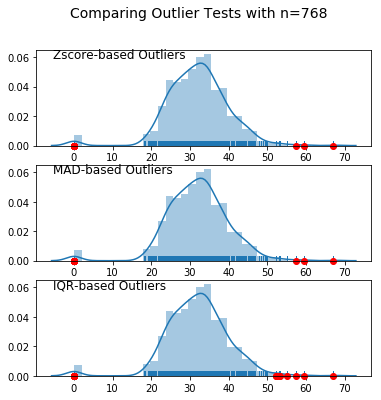

______________________________________________________________________
variable name:  PF 

Statistical description: 
count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: PF, dtype: float64

Skewness =  1.919911066307204
Kurtosis =  5.5949535279830584


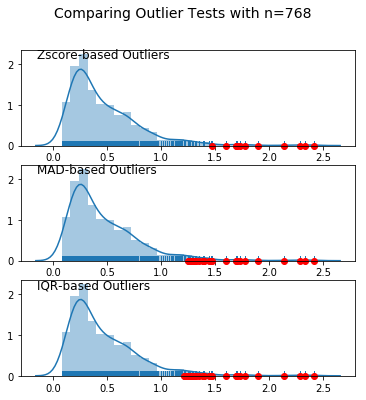

______________________________________________________________________
variable name:  Age 

Statistical description: 
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

Skewness =  1.1295967011444805
Kurtosis =  0.6431588885398942


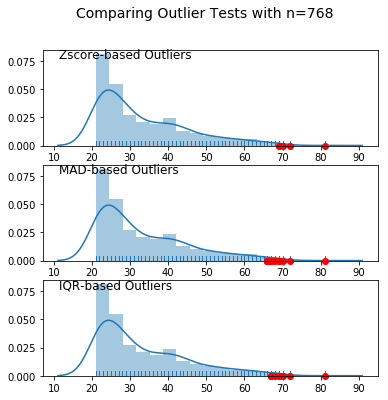

In [6]:
# Univariate analysis of Continuous Faetures: Statistical description (mean, std, skewness, Kurtosis) & Distribution plots
L=[]
for i in df.columns[:-1]:
    print('_'*70 )
    print('variable name: ', i, '\n')
    print('Statistical description: \n', df[i].describe(), '\n', sep='')
    if df[i].min()==0: 
        L.append(i)
    print("Skewness = ", df[i].skew())
    print("Kurtosis = ", df[i].kurt())
    
    plot_outliers(np.array(df[i]))
    plt.show()

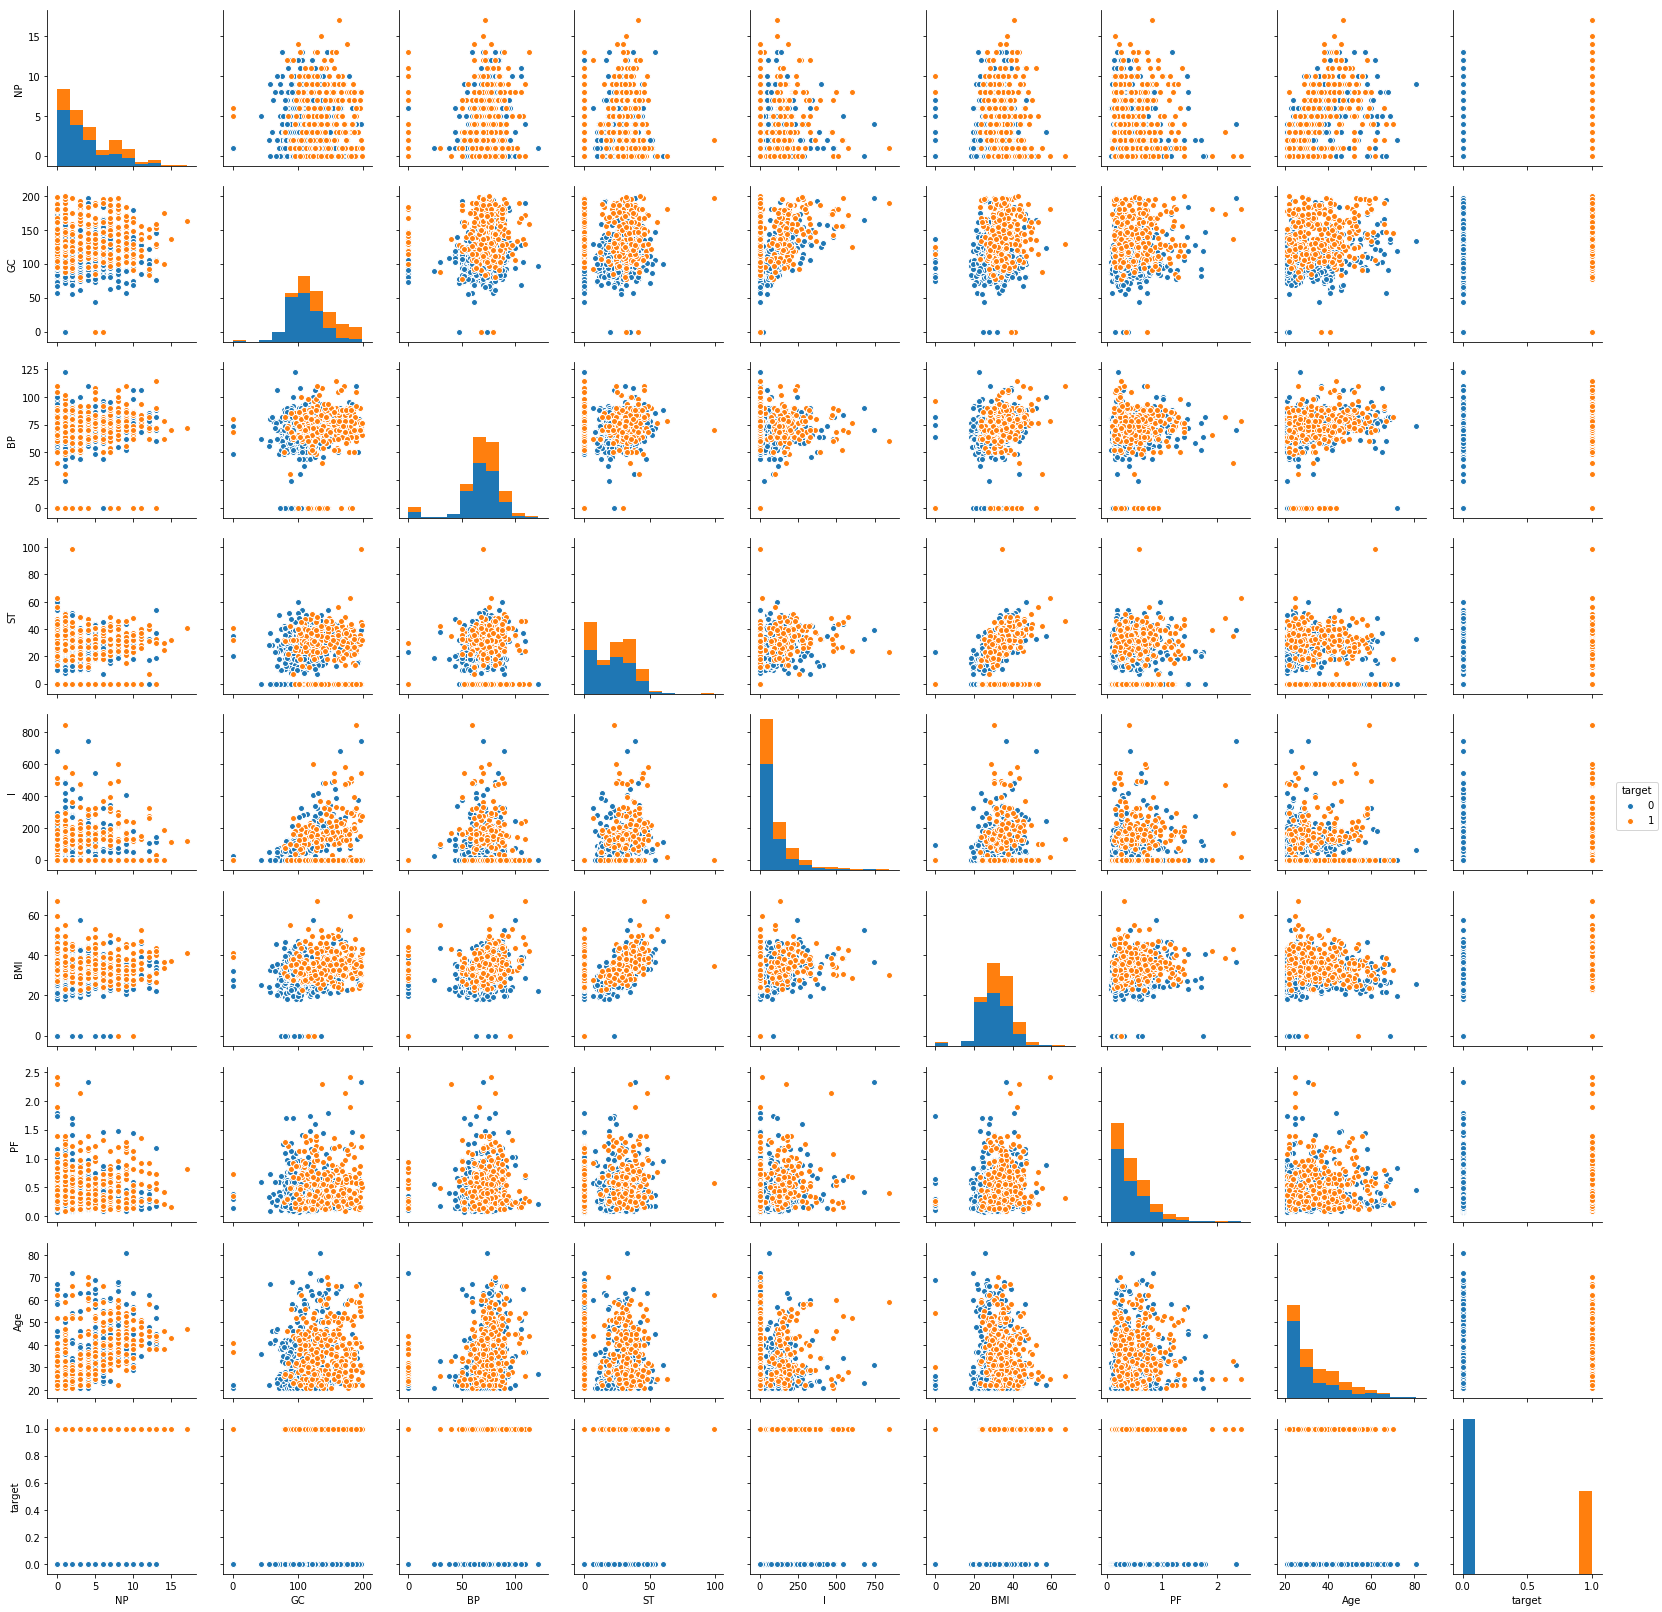

In [7]:
# Multi-variable analysis of Continuous Features: Pairplot of all continuous features for different classes of target
sns.pairplot(df, hue="target")

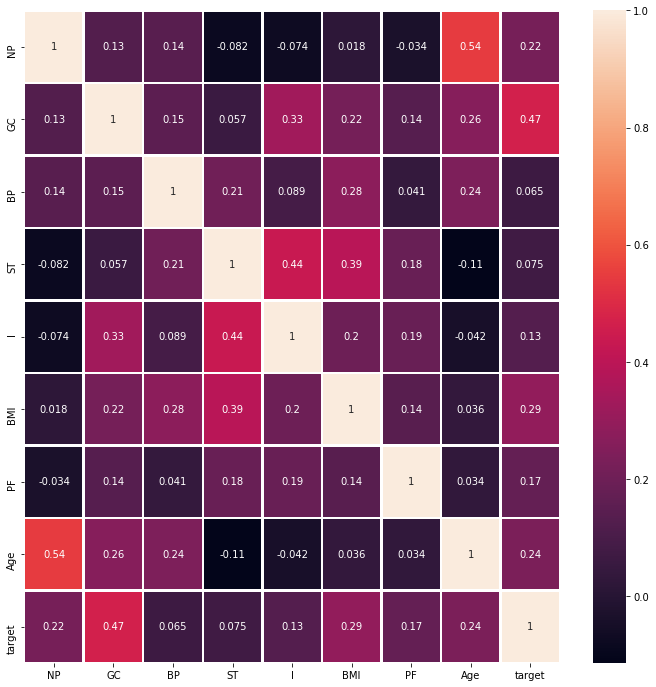

In [8]:
# Multivariable study: heatmap of correlation between continuous features
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(), annot=True, linewidths=1.5, ax=ax )

______________________________________________________________________
variable name:  NP 

z_statistic=  5.9069614794974905
p_value=  6.821925600457145e-09


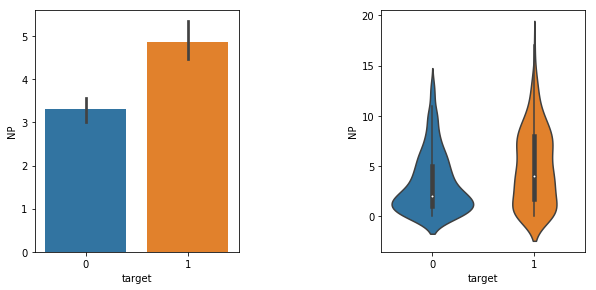

______________________________________________________________________
variable name:  GC 

z_statistic=  13.751537067396411
p_value=  2.6441613495403223e-36


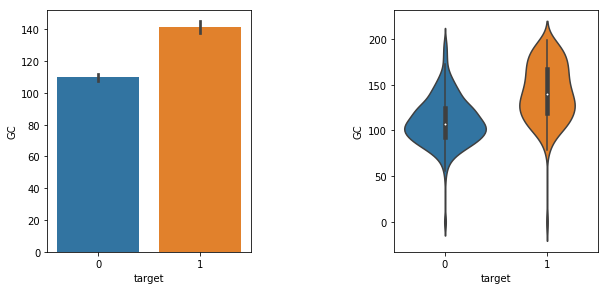

______________________________________________________________________
variable name:  BP 

z_statistic=  1.7130865949770784
p_value=  0.08735424821461578


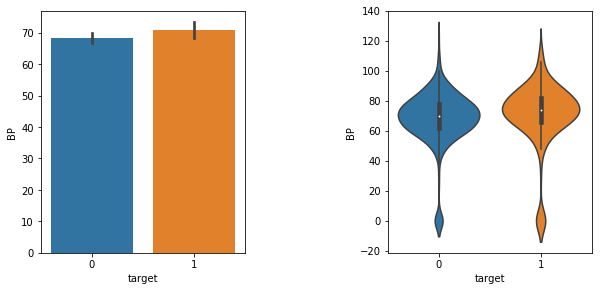

______________________________________________________________________
variable name:  ST 

z_statistic=  1.9705792220450487
p_value=  0.04935586008648019


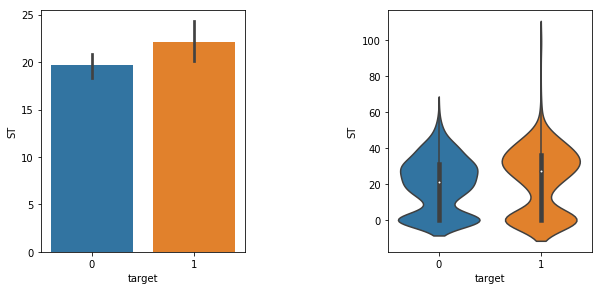

______________________________________________________________________
variable name:  I 

z_statistic=  3.3008947714793337
p_value=  0.0010469286528313425


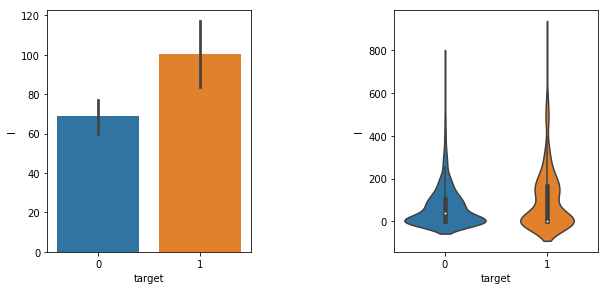

______________________________________________________________________
variable name:  BMI 

z_statistic=  8.619316881357946
p_value=  6.56623762470833e-17


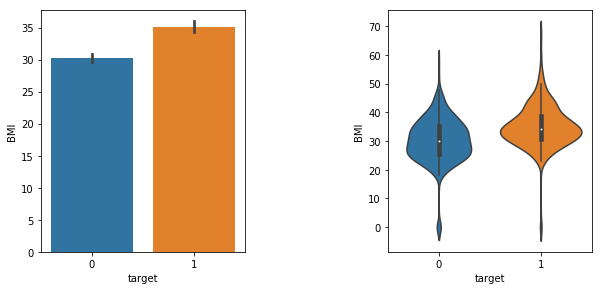

______________________________________________________________________
variable name:  PF 

z_statistic=  4.576812008291278
p_value=  6.100481424240326e-06


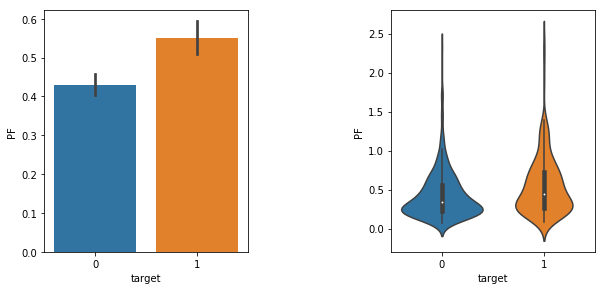

______________________________________________________________________
variable name:  Age 

z_statistic=  6.92073837898804
p_value=  1.2015125273113395e-11


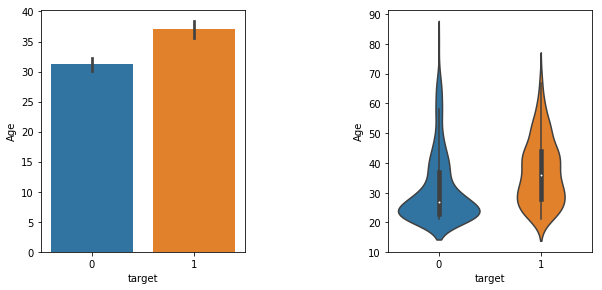

In [9]:
# Multivariable analysis of features: Barplot & Violinplot of each continuous feature for different classes of traget
for i in df.columns[:-1]:
    print('_'*70 )
    print('variable name: ', i, '\n')
    
    S1=df[df['target']==1][i]
    S0=df[df['target']==0][i]
    t_test=stats.ttest_ind(S1, S0, equal_var = False)
    print('z_statistic= ', t_test[0])
    print('p_value= ', t_test[1])
    
    fig = plt.figure(figsize=(9, 4))
    
    ax1 = fig.add_subplot(121)
    sns.barplot(x='target', y=i, data=df)
    
    ax2 = fig.add_subplot(122)
    sns.violinplot( x="target", y=i, data=df)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.7)
    
    plt.show()

______________________________________________________________________
variable name:  NP


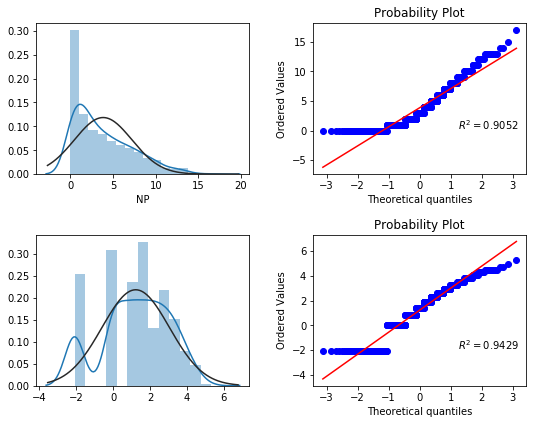

______________________________________________________________________
variable name:  GC


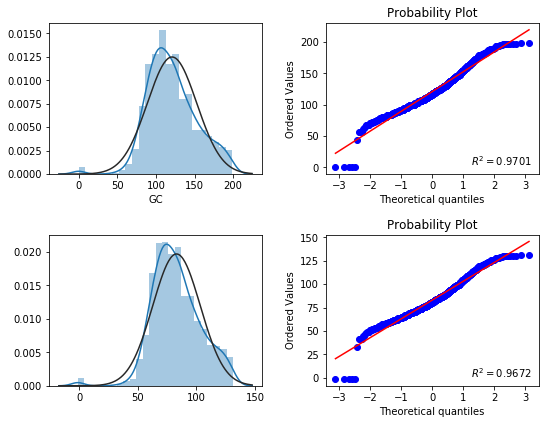

______________________________________________________________________
variable name:  BP


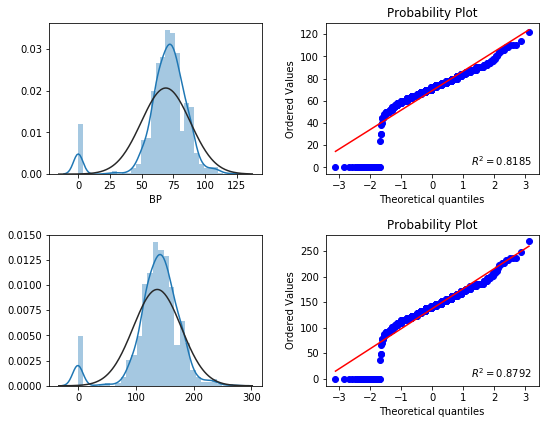

______________________________________________________________________
variable name:  ST


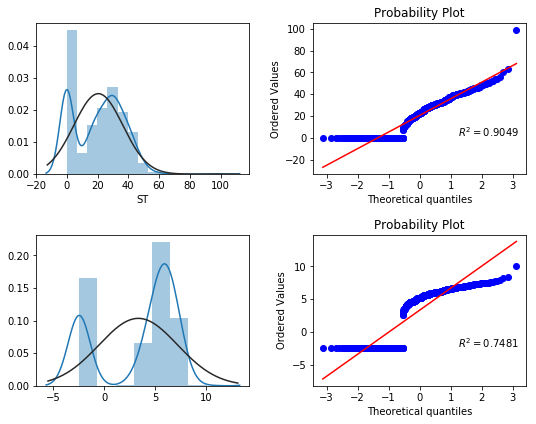

______________________________________________________________________
variable name:  I


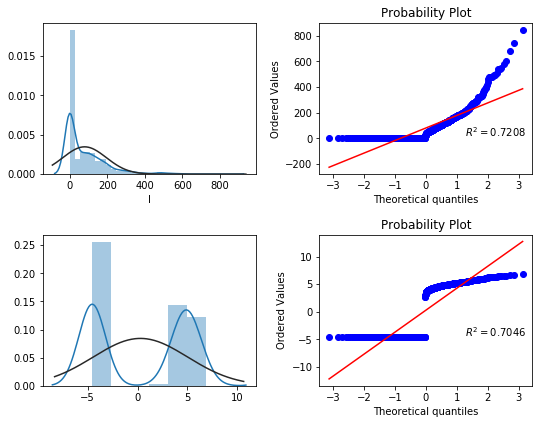

______________________________________________________________________
variable name:  BMI


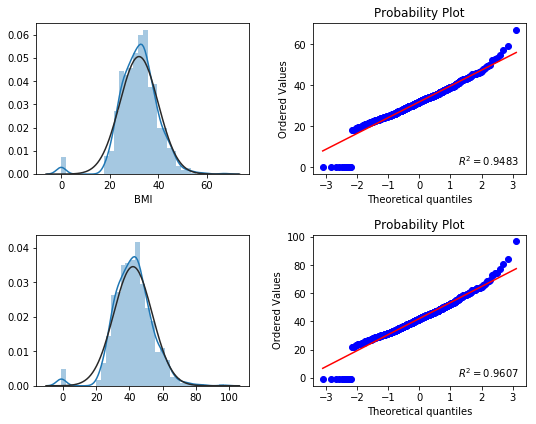

______________________________________________________________________
variable name:  PF


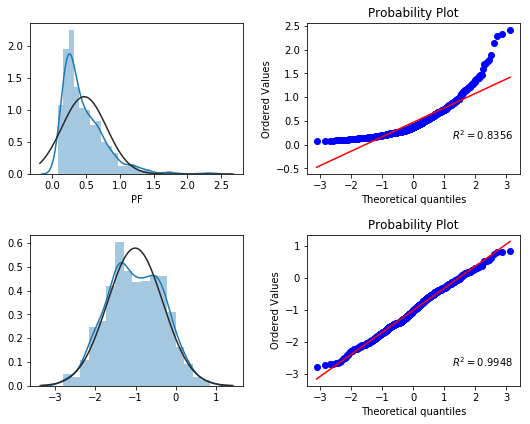

______________________________________________________________________
variable name:  Age


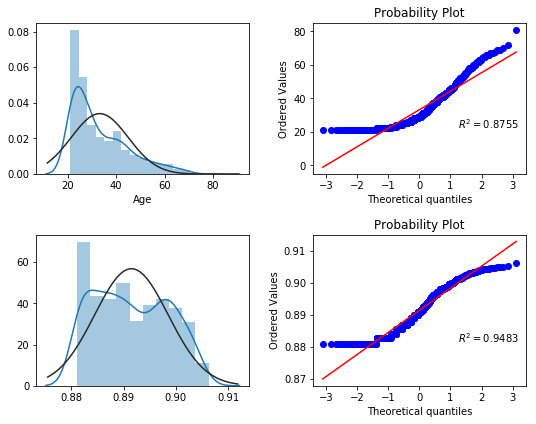

In [10]:
# To test the Statistical Assumptions on Continuous variables: We check if our data meets the assumptions reuired by most mutivariate techniques _________
for i in df.columns[:-1]:
    print('_'*70 )
    print('variable name: ', i)
    
    fig = plt.figure(figsize=(8, 6))
    
    ax1 = fig.add_subplot(221)
    ax1=sns.distplot(df[i], fit=stats.norm)
    
    ax2 = fig.add_subplot(222)
    res=stats.probplot(df[i], plot=ax2, rvalue=True)
    
    b=0
    if i in L:
        b=0.01
    
    ax3 = fig.add_subplot(223)
    ax3=sns.distplot(stats.boxcox(b+df[i])[0], fit=stats.norm)
    
    ax4 = fig.add_subplot(224)
    res=stats.probplot(stats.boxcox(b+df[i])[0], dist=stats.norm, plot=ax4, rvalue=True)
    
    fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.3)
    plt.show()

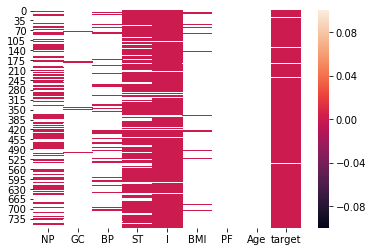

In [11]:
# To check for the Zero values (sometimes zero values are actually Missing values):
sns.heatmap(df[df==0])

In [12]:
# We replace the zero values with Median  of each feature:
df['ST'].replace(0, df[df['ST']!=0]['ST'].median(), inplace=True)

df['GC'].replace(0, df[df['GC']!=0]['GC'].median(), inplace=True)

df['BP'].replace(0, df[df['BP']!=0]['BP'].median(), inplace=True)

df['BMI'].replace(0, df[df['BMI']!=0]['BMI'].median(), inplace=True)

df['I'].replace(0, df[df['I']!=0]['I'].median(), inplace=True)

#  Note: After replacement of zero values we can repeat all of previous data exploration steps (i.e. distribution plots, heatmap, etc.)
